In [1]:
import pandas as pd

unacceptable_motor = pd.read_csv('/home/ymerel/fmri/OHBM_2026_neurovariants/data/emotion_1000/unacceptable_dataset.csv')
unacceptable_emotion = pd.read_csv('/home/ymerel/fmri/OHBM_2026_neurovariants/data/motor_1000/unacceptable_dataset.csv')

# Check if the sets of 'id' values are equal
ids_1 = set(unacceptable_motor['id'])
ids_2 = set(unacceptable_emotion['id'])

if ids_1 == ids_2:
    print("Both datasets contain the same 'id' values.")
else:
    print("The 'id' values in the datasets are NOT the same.")
    # Optionally, show the difference
    print("IDs only in unacceptable_motor:", ids_1 - ids_2)
    print("IDs only in unacceptable_emotion:", ids_2 - ids_1)

Both datasets contain the same 'id' values.


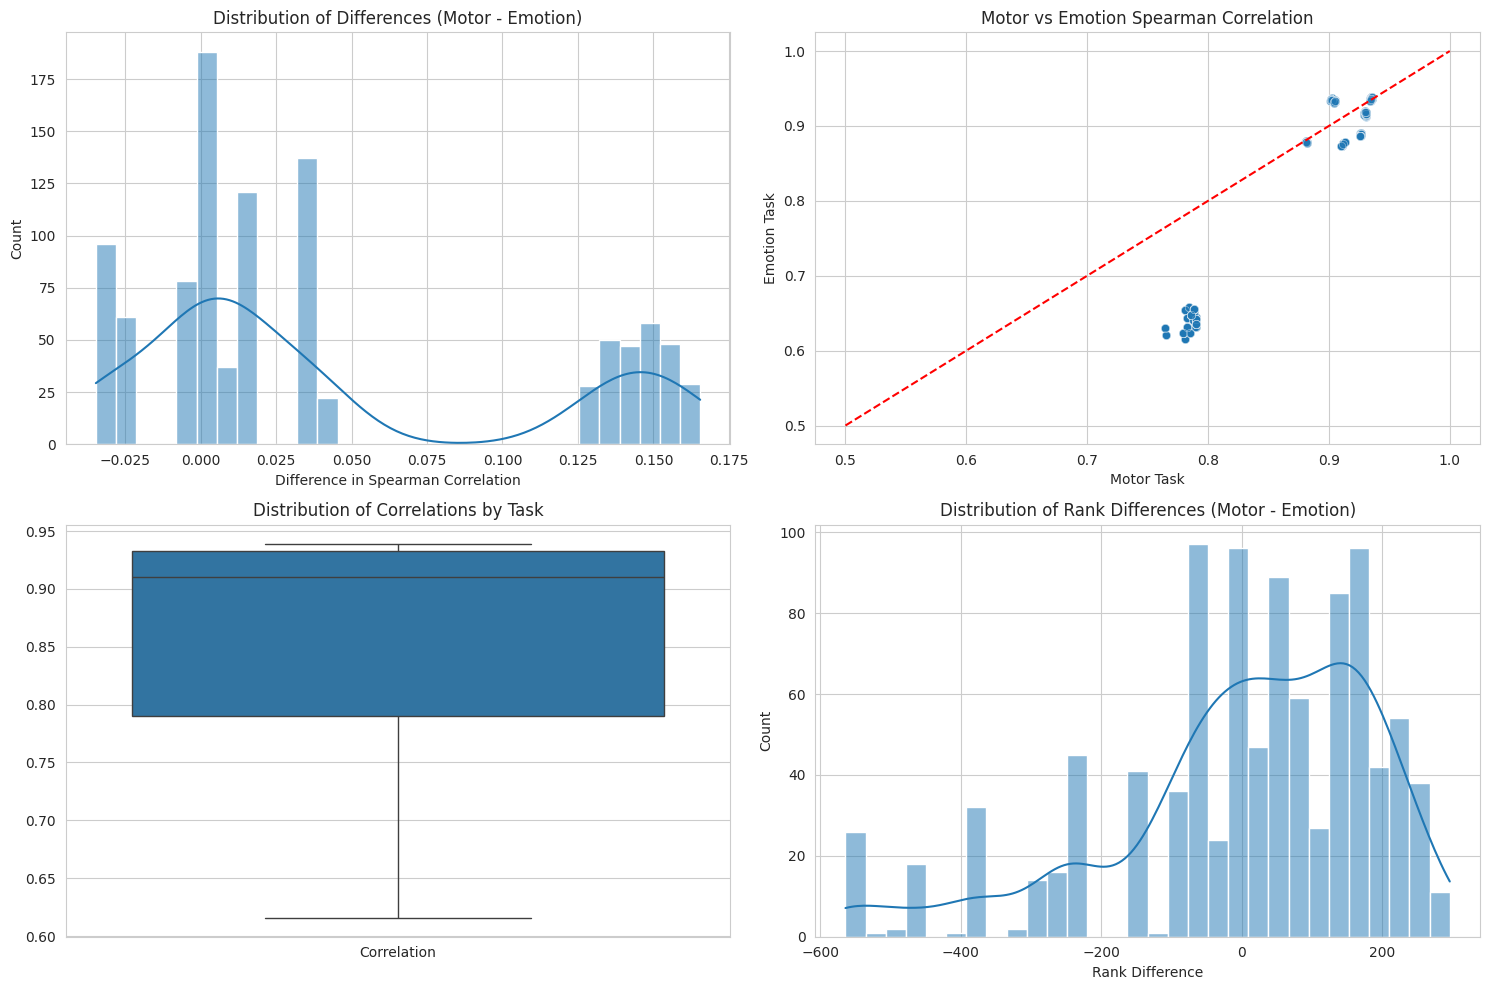

Summary Statistics:
mean_diff: 0.0411
median_diff: 0.0134
std_diff: 0.0651
min_diff: -0.0347
max_diff: 0.1655

Wilcoxon signed-rank test p-value: 0.0000


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

datadir = "/home/ymerel/fmri/OHBM_2026_neurovariants/data"
ds_path = os.path.join(datadir, 'dataset.csv')
motor_1000 = pd.read_csv(os.path.join(datadir, 'motor_1000', 'dataset.csv'), delimiter=';')
emotion_1000 = pd.read_csv(os.path.join(datadir, 'emotion_1000', 'dataset.csv'), delimiter=';')

# Merge the two datasets on 'id'
merged = pd.merge(motor_1000, emotion_1000, on='id', suffixes=('_motor', '_emotion'))

# Compute differences
merged['diff'] = merged['from_mean_motor'] - merged['from_mean_emotion']
merged['abs_diff'] = merged['diff'].abs()

# Summary statistics
summary = {
    'mean_diff': merged['diff'].mean(),
    'median_diff': merged['diff'].median(),
    'std_diff': merged['diff'].std(),
    'min_diff': merged['diff'].min(),
    'max_diff': merged['diff'].max(),
}

# Rank order analysis
merged['rank_motor'] = merged['from_mean_motor'].rank()
merged['rank_emotion'] = merged['from_mean_emotion'].rank()
merged['rank_diff'] = merged['rank_motor'] - merged['rank_emotion']

# Statistical testing
t_stat, p_val = stats.wilcoxon(merged['from_mean_motor'], merged['from_mean_emotion'])

# Plotting
plt.figure(figsize=(15, 10))

# Histogram of differences
plt.subplot(2, 2, 1)
sb.histplot(merged['diff'], bins=30, kde=True)
plt.title('Distribution of Differences (Motor - Emotion)')
plt.xlabel('Difference in Spearman Correlation')

# Scatter plot
plt.subplot(2, 2, 2)
sb.scatterplot(data=merged, x='from_mean_motor', y='from_mean_emotion', alpha=0.5)
plt.plot([0.5, 1], [0.5, 1], 'r--')  # Line of equality
plt.title('Motor vs Emotion Spearman Correlation')
plt.xlabel('Motor Task')
plt.ylabel('Emotion Task')

# Boxplot of correlations by task
plt.subplot(2, 2, 3)
sb.boxplot(data=pd.melt(merged, value_vars=['from_mean_motor', 'from_mean_emotion'], var_name='Task', value_name='Correlation'))
plt.title('Distribution of Correlations by Task')

# Rank differences
plt.subplot(2, 2, 4)
sb.histplot(merged['rank_diff'], bins=30, kde=True)
plt.title('Distribution of Rank Differences (Motor - Emotion)')
plt.xlabel('Rank Difference')

plt.tight_layout()
plt.show()

# Print summary
print("Summary Statistics:")
for k, v in summary.items():
    print(f"{k}: {v:.4f}")
print(f"\nWilcoxon signed-rank test p-value: {p_val:.4f}")
